# 1. Notebook Settings

In [1]:
#Directory data loading parameters - training data
ncdf_directory = 'test_data/hindcasts/'              #name of directory with separate ncdf files for observations and each model 
observations_file = 'chirps_hindcast.nc'    #name of file within ncdf_directory with observations data

#Single File loading parameters - training data
filepath = 'None'                    #path to a file with netCDF data containing observations and all models 
observations_key = 'observations'         #name of the variable containing observations in your ncdf file


#Directory data loading parameters - forecast data
f_ncdf_directory = 'test_data/forecasts/'              #name of directory with separate ncdf files for observations and each model 

#Single File Loading parameters - forecast data
f_filepath = 'None'                    #path to a file with netCDF data containing observations and all models 

#shared loading parameters
latitude_key = 'Y'                        #name of latitude coordinate in your ncdf file
longitude_key='X'                         #name of longitude coordinate in your ncdf file 
time_key = 'S'                            #name of time coordinate in your ncdf file 
observations_time_key='T'
using_datetime = False                    #do your ncdf files use the DateTime object for time keys? or a different format
axis_order = 'txy'                        #what are the order of the axes within these files - 'txy' for time, x, y.  x, y, time automatically supported. others not supported.

#MME Save/Load settings
load_mme = 'None' #path of saved mme file to load
save_file = 'test12.mme' #where to save new mme
hindcast_export_file = 'None'

# 2. MME Skill Evaluation
#### 2a. Analysis Settings

In [2]:
#analysis parameters 
mme_methodologies = ['EM', 'BCEM', 'MLR', 'PCR', 'SVD', 'ELM', 'EWP',  'PCA-ELM' ] #'MLR', 'PCR', 'SVD', 'ELM', 'EWP',list of MME methodologies to use - available: ['EM', 'MLR', 'ELM', 'Ridge'] 'SLFN' also works but is slow for 2D data
metrics = ['SpearmanCoef', 'PearsonCoef', 'RMSE', 'MAE', 'IOA'] #list of metrics to compute - available: ['SpearmanCoef', 'SpearmanP', 'PearsonCoef', 'PearsonP', 'MSE', 'MAE', 'RMSE', 'IOA']

#skill plotting parameters - select what skill to plot 
metrics_to_plot_skill = ['SpearmanCoef',  'PearsonCoef',  'RMSE', 'IOA'] #you have to have selected these for analysis in order to plot them 
mme_methodologies_to_plot_skill = [ 'EM', 'BCEM', 'PCA-ELM'] #' 'MLR', 'PCR', 'Obs', 'ELM', 'EWP','SVD',you have to have selected these for analysis in order to plot them 
models_to_plot_skill = ['Model 1', 'Model 2'] #'Model {}' from 1 to n mme member models

#### 2b. Model Parameters

In [3]:
#EnsembleMean settings
em_xval_window = 1   #odd number - behavior undefined for even number

#Bias-Corrected Ensemble Mean
bcem_xval_window = 1 # odd

#MLR Settings
mlr_fit_intercept = True #Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered) (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
mlr_xval_window = 1   #odd number - behavior undefined for even number
mlr_standardization = None  #'std_anomaly' or None

#PCR Settings
pcr_fit_intercept = True #Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered) (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
pcr_xval_window = 1   #odd number - behavior undefined for even number
pcr_standardization = None  #'std_anomaly' or None
pcr_pca_variability = 0.90

#SVD settings
svd_xval_window = 1 #odd number - behavior undefined for even number
svd_standardization = None #'minmax' or 'std_anomaly' or None

#ELM Settings 
elm_xval_window = 1 #odd number - behavior undefined for even number
elm_hidden_layer_neurons=10 #number of hidden layer neurons - overridden if using PCA init
elm_activation='sigm' #“lin” for linear, “sigm” or “tanh” for non-linear, “rbf_l1”, “rbf_l2” or “rbf_linf” for radial basis function neurons (https://hpelm.readthedocs.io/en/latest/api/elm.html)
elm_standardization= 'minmax' #'minmax' or 'std_anomaly' or None
elm_minmax_range = [-1, 1] #choose [minimum, maximum] values for minmax scaling. ignored if not using minmax scaling

#ELM with PCA Settings 
ewp_xval_window = 1 #odd number - behavior undefined for even number
ewp_hidden_layer_neurons=10 #number of hidden layer neurons - overridden if using PCA init
ewp_activation='sigm' #“lin” for linear, “sigm” or “tanh” for non-linear, “rbf_l1”, “rbf_l2” or “rbf_linf” for radial basis function neurons (https://hpelm.readthedocs.io/en/latest/api/elm.html)
ewp_standardization= 'minmax' #'minmax' or 'std_anomaly' or None
ewp_minmax_range = [-1, 1] #choose [minimum, maximum] values for minmax scaling. ignored if not using minmax scaling
ewp_pca_variability = 0.90 #choose fraction of variability to keep with PCA

#PCA-ELM Settings 
pcaelm_xval_window = 1 #odd number - behavior undefined for even number
pcaelm_activation='sigm' #“lin” for linear, “sigm” or “tanh” for non-linear (https://hpelm.readthedocs.io/en/latest/api/elm.html)
pcaelm_standardization= None #'minmax' or 'std_anomaly' or None
pcaelm_minmax_range = [-1, 1] #choose [minimum, maximum] values for minmax scaling. ignored if not using minmax scaling
pcaelm_pca_variability = 0.99 #percent of variability to retain - hidden layer neurons determined automatically

#### 2c. Model Construction - Do Not Edit

In [4]:
import pymme as pm #load pymme files 
try:
    mme = pm.MME.load(load_mme) #load saved MME object
except FileNotFoundError:
    mme = pm.MME() #create MME object 
    print('Files Read:')
    try:
        mme.read_multiple_ncdf(ncdf_directory, observations_file, latitude_key=latitude_key, longitude_key=longitude_key, time_key=time_key, obs_time_key=observations_time_key, axis_order=axis_order)
    except:
        mme.read_full_ncdf(filepath, latitude_key=latitude_key, longitude_key=longitude_key, time_key=time_key, observations_key=observations_key, using_datetime=using_datetime, axis_order=axis_order)
    
    print('\nComputing MMEs')
    for method in mme_methodologies:
        print(method)
        if method == 'MLR':
            mme.construct_crossvalidated_mme_hindcasts(method, xval_window=mlr_xval_window, standardization=mlr_standardization, fit_intercept=mlr_fit_intercept)
        elif method == 'PCR':
            mme.construct_crossvalidated_mme_hindcasts(method, xval_window=pcr_xval_window, standardization=pcr_standardization, fit_intercept=pcr_fit_intercept, pca_variability=pcr_pca_variability)
        elif method == 'ELM':
            mme.construct_crossvalidated_mme_hindcasts(method, xval_window=elm_xval_window, hidden_layer_neurons=elm_hidden_layer_neurons, activation=elm_activation, standardization=elm_standardization, minmax_range=elm_minmax_range)
        elif method== 'PCA-ELM':
            mme.construct_crossvalidated_mme_hindcasts(method, xval_window=pcaelm_xval_window, activation=pcaelm_activation, standardization=pcaelm_standardization, minmax_range=pcaelm_minmax_range, pca_variability=pcaelm_pca_variability, W=True)
        elif method== 'EWP':
            mme.construct_crossvalidated_mme_hindcasts(method, xval_window=ewp_xval_window, hidden_layer_neurons=ewp_hidden_layer_neurons, activation=ewp_activation, standardization=ewp_standardization, minmax_range=ewp_minmax_range, pca_variability=ewp_pca_variability, W=False)
        elif method == 'SVD':
            mme.construct_crossvalidated_mme_hindcasts(method, xval_window=svd_xval_window, standardization=svd_standardization)
        elif method == 'EM':
            mme.construct_crossvalidated_mme_hindcasts(method, xval_window=em_xval_window, standardization=None)
        elif method == 'BCEM':
            mme.construct_crossvalidated_mme_hindcasts(method, xval_window=bcem_xval_window, standardization='std_anomaly')
        else:
            print('Invalid MME {}'.format(method))
    
    print('\nCalculating Skill')
    spearman_flag, pearson_flag = 0, 0
    for metric in metrics:
        print(metric)
        if metric in ['SpearmanCoef', 'SpearmanP'] and spearman_flag == 0:
            spearman_flag = 1 
            mme.Spearman()
        elif metric in ['PearsonCoef', 'PearsonP'] and pearson_flag == 0:
            pearson_flag = 1
            mme.Pearson()
        elif metric == 'MAE':
            mme.MAE()
        elif metric == 'MSE':
            mme.MSE()
        elif metric == 'RMSE':
            mme.MSE(squared=False)
        elif metric == 'IOA':
            mme.IOA()
        else:
            print('Invalid Metric {}'.format(metric))
    
    print('\nDone')

Dill Pickle undetected: Just saving data, forgetting models. Try "conda install dill"
Dill Pickle undetected: Just saving data, forgetting models. Try "conda install dill"
Files Read:
cansipsv2_hindcast.nc chirps_hindcast.nc
cola_hindcast.nc chirps_hindcast.nc
flor_b01_hindcast.nc chirps_hindcast.nc
chirps_hindcast.nc chirps_hindcast.nc
flor_a06_hindcast.nc chirps_hindcast.nc

Computing MMEs
EM
BCEM
MLR
PCR
SVD
ELM
EWP
PCA-ELM

Calculating Skill
SpearmanCoef
PearsonCoef
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

IndexError: too many indices for array

#### 2d. Cross-Validated Hindcast Skill Maps - Do Not Edit

KeyError: 'EM'

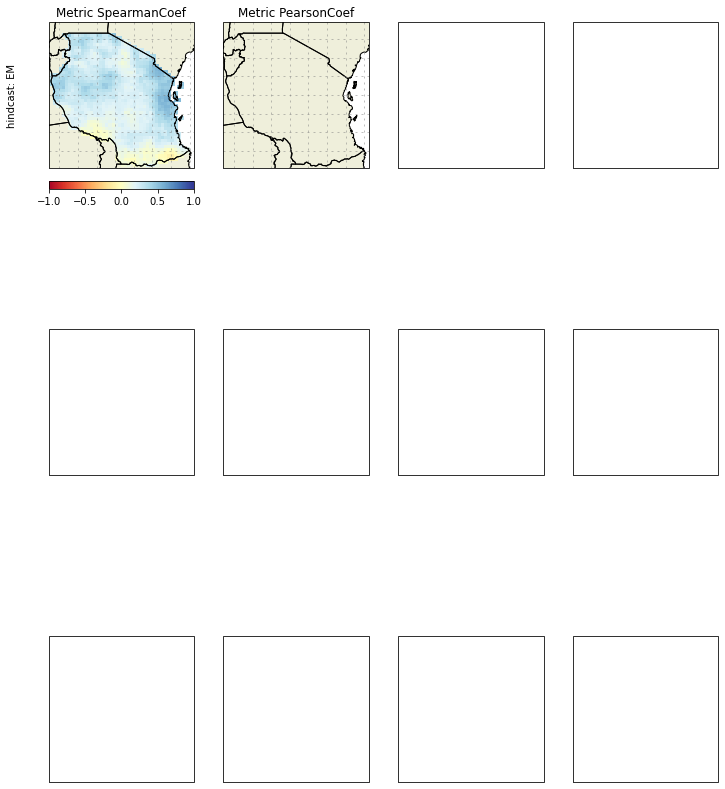

In [5]:
mme.plot(setting='xval_hindcast_skill', hindcasts=mme_methodologies_to_plot_skill, metrics=metrics_to_plot_skill)

#### 2e. Cross-Validated Hindcast Timeline (Single Point - select indexes)

In [ ]:
mme.plot(point=[15,15], methods=mme_methodologies_to_plot_skill)

#### 2f. Saving MME - Do Not Edit

In [ ]:
if save_file != 'None':
    mme.save(fname=save_file)
    
if hindcast_export_file != 'None':
    mme.export(hindcast_export_file)
    print('Saved {}'.format(hindcast_export_file))

# 3. Forecast Evaluation - Training Skill
#### 3a. Analysis Settings

In [ ]:
#forecast analysis parameters 
forecast_methodologies = ['EM', 'BCEM', 'MLR', 'PCR', 'SVD', 'ELM', 'EWP',  'PCA-ELM' ] #'MLR', 'PCR', 'SVD', 'ELM', 'EWP',list of MME methodologies to use - available: ['EM', 'MLR', 'ELM', 'Ridge'] 'SLFN' also works but is slow for 2D data
metrics = ['SpearmanCoef', 'PearsonCoef', 'RMSE', 'MAE', 'IOA'] #list of metrics to compute - available: ['SpearmanCoef', 'SpearmanP', 'PearsonCoef', 'PearsonP', 'MSE', 'MAE', 'RMSE', 'IOA']

#skill plotting parameters - plot forecast training skill (skill of model trained on data at predicting same data)
metrics_to_plot_skill = ['SpearmanCoef',  'PearsonCoef',  'RMSE', 'IOA'] #you have to have selected these for analysis in order to plot them 
forecast_methodologies_to_plot_skill = ['EM', 'BCEM',  'PCA-ELM'] #''MLR', 'PCR', 'ELM', 'EWP','SVD', you have to have selected these for analysis in order to plot them 
models_to_plot_skill = ['Model 1', 'Model 2'] #'Model {}' from 1 to n mme member models

#### 3b. Forecast Model Computation - Do Not Edit

In [ ]:
print('\nComputing MMEs')
for method in forecast_methodologies:
    print(method)
    if method == 'MLR':
        mme.train_forecast_model(method,  standardization=mlr_standardization, fit_intercept=mlr_fit_intercept)
    elif method == 'PCR':
        mme.train_forecast_model(method, standardization=pcr_standardization, fit_intercept=pcr_fit_intercept, pca_variability=pcr_pca_variability)
    elif method == 'ELM':
        mme.train_forecast_model(method,  hidden_layer_neurons=elm_hidden_layer_neurons, activation=elm_activation, standardization=elm_standardization, minmax_range=elm_minmax_range)
    elif method== 'PCA-ELM':
        mme.train_forecast_model(method,  activation=pcaelm_activation, standardization=pcaelm_standardization, minmax_range=pcaelm_minmax_range, pca_variability=pcaelm_pca_variability, W=True)
    elif method== 'EWP':
        mme.train_forecast_model(method,  hidden_layer_neurons=ewp_hidden_layer_neurons, activation=ewp_activation, standardization=ewp_standardization, minmax_range=ewp_minmax_range, pca_variability=ewp_pca_variability, W=False)
    elif method == 'SVD':
        mme.train_forecast_model(method,  standardization=svd_standardization)
    elif method == 'EM':
        mme.train_forecast_model(method, standardization=None)
    elif method == 'BCEM':
        mme.train_forecast_model(method,  standardization='std_anomaly')
    else:
        print('Invalid MME {}'.format(method))

print('\nCalculating Skill')
spearman_flag, pearson_flag = 0, 0
for metric in metrics:
    print(metric)
    if metric in ['SpearmanCoef', 'SpearmanP'] and spearman_flag == 0:
        spearman_flag = 1 
        mme.Spearman(setting='training_forecast_metrics')
    elif metric in ['PearsonCoef', 'PearsonP'] and pearson_flag == 0:
        pearson_flag = 1
        mme.Pearson(setting='training_forecast_metrics')
    elif metric == 'MAE':
        mme.MAE(setting='training_forecast_metrics')
    elif metric == 'MSE':
        mme.MSE(setting='training_forecast_metrics')
    elif metric == 'RMSE':
        mme.MSE(squared=False, setting='training_forecast_metrics')
    elif metric == 'IOA':
        mme.IOA(setting='training_forecast_metrics')
    else:
        print('Invalid Metric {}'.format(metric))

print('\nDone')

#### 3c. Forecast Skill - Training Data - Do Not Edit

In [ ]:
mme.plot(setting='training_forecast_skill', training_forecasts=forecast_methodologies_to_plot_skill, metrics=metrics_to_plot_skill)

# 4. Real Time Forecasting
#### 4a. Real Time Forecast Settings

In [ ]:
#forecast analysis parameters 
forecast_methodologies = ['EM', 'BCEM', 'MLR', 'PCR', 'SVD', 'ELM', 'EWP',  'PCA-ELM'   ] #list of MME methodologies to use - available: ['EM', 'MLR', 'ELM', 'Ridge'] 'SLFN' also works but is slow for 2D data

In [ ]:
try:
    mme.ncdf_forecast_data = []
    inputs = mme.read_multiple_ncdf(f_ncdf_directory, 'None', latitude_key=latitude_key, longitude_key=longitude_key, time_key='T', obs_time_key=observations_time_key, axis_order=axis_order, is_forecast=True)
except:
    inputs = mme.read_full_ncdf(f_filepath, latitude_key=latitude_key, longitude_key=longitude_key, time_key=time_key, obs_time_key=observations_time_key, observations_key=observations_key, using_datetime=using_datetime, axis_order=axis_order, is_forecast=True)

print(inputs[:,0,0,:].transpose().shape)    
for method in forecast_methodologies:
    print(method)
    if method == 'MLR':
        print(mme.forecast(inputs, method,  standardization=mlr_standardization, fit_intercept=mlr_fit_intercept).shape)
    elif method == 'PCR':  ##how to do pca  on new data??
        print(mme.forecast(inputs, method, standardization=pcr_standardization, fit_intercept=pcr_fit_intercept, pca_variability=pcr_pca_variability).shape)
    elif method == 'ELM':
        print(mme.forecast(inputs, method,  hidden_layer_neurons=elm_hidden_layer_neurons, activation=elm_activation, standardization=elm_standardization, minmax_range=elm_minmax_range).shape)
    elif method== 'PCA-ELM': ##how to do pca  on new data??
        print(mme.forecast(inputs, method,  activation=pcaelm_activation, standardization=pcaelm_standardization, minmax_range=pcaelm_minmax_range, pca_variability=pcaelm_pca_variability, W=True).shape)
    elif method== 'EWP':##how to do pca  on new data??
        print(mme.forecast(inputs, method,  hidden_layer_neurons=ewp_hidden_layer_neurons, activation=ewp_activation, standardization=ewp_standardization, minmax_range=ewp_minmax_range, pca_variability=ewp_pca_variability, W=False).shape)
    elif method == 'SVD':
        print(mme.forecast(inputs, method,  standardization=svd_standardization).shape)
    elif method == 'EM':
        print(mme.forecast(inputs, method, standardization=None).shape)
    elif method == 'BCEM':
        print(mme.forecast(inputs, method,  standardization='std_anomaly').shape)
    else:
        print('Invalid MME {}'.format(method))

## 4b. Deterministic Forecasts

In [ ]:

mme.plot(setting='Real Time Deterministic Forecast', rte_forecasts=forecast_methodologies)
